In [1]:
import plantcv as pcv 
import pandas as pd
import os
import numpy as np
import cv2

In [2]:
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [3]:
import os

In [ ]:
######### My Batch 1 ########

In [4]:
os.chdir("/Users/nhutran/Documents/batch1")

In [ ]:
### batch 1- different time points ###

In [492]:
#os.chdir("/Users/nhutran/Documents/batch1/24.10")
#os.chdir("/Users/nhutran/Documents/batch1/30.10")
#os.chdir("/Users/nhutran/Documents/batch1/06.11")
os.chdir("/Users/nhutran/Documents/batch1/13.11")

In [640]:
# Input/output options
args = WorkflowInputs(
    images=["G.JPG"],    
    names="G_1311",
    result="G_1311_res",
    outdir=".",
    writeimg=True,
    debug="plot",
    sample_label="genotype"
    )

In [641]:
# Set debug to the global parameter 
pcv.params.debug = args.debug

# Set plotting size (default = 100)
pcv.params.dpi = 100

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

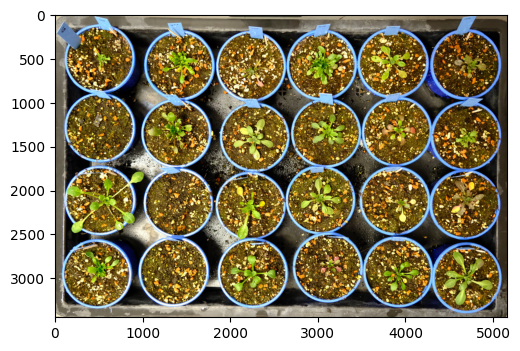

In [642]:
# Inputs:
#   filename = Image file to be read in 
#   mode     = How to read in the image; either 'native' (default), 
#              'rgb', 'gray', 'csv', or 'envi'
img, path, filename = pcv.readimage(filename="/Users/nhutran/Documents/batch1/13.11/G.JPG")

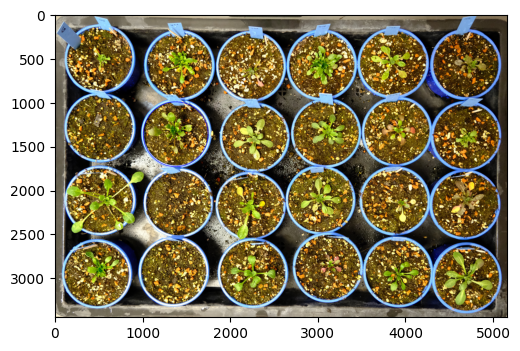

In [648]:
# We define the circular region interest by x,y for the center, and r for the radius of the circle to get made 
reference_roi = pcv.roi.circle(img=img, x=1375, y=1360, r=370)

In [649]:
#real-life reference object's size # here is diameter of the pots
pot_dia_mm = 90
# Calculate the scaling factor based on the diameter of the pots
pixels_per_mm = (370/2)/(pot_dia_mm/2) # 180 is radius of the reference_roi = r/2 = 360/2
scaling_factor = 1/pixels_per_mm  # Invert the ratio to get the scaling factor


In [650]:
# Resize the image based on the scaling factor
scaled_img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)

In [ ]:
# Continue with PlantCV analysis on the scaled image


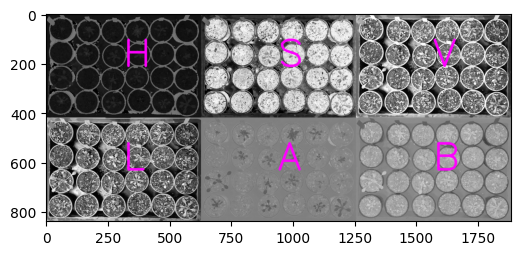

In [651]:
colorspaces = pcv.visualize.colorspaces(rgb_img=scaled_img, original_img=False)


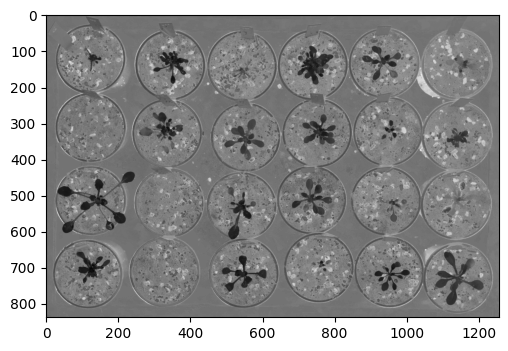

In [652]:
a = pcv.rgb2gray_lab(rgb_img=scaled_img, channel='a')

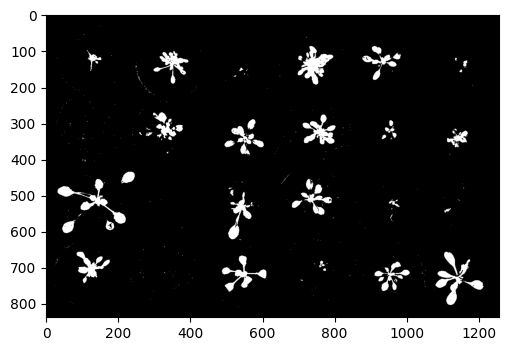

In [678]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=110, object_type='dark')


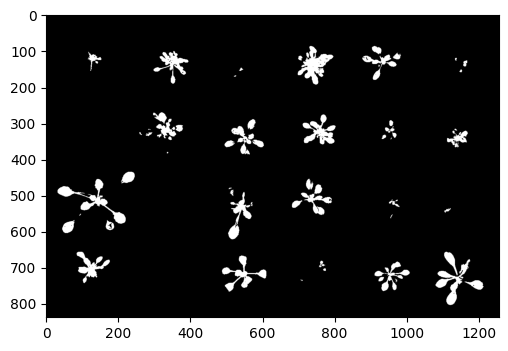

In [679]:
a_fill = pcv.fill(bin_img=a_thresh, size=10)

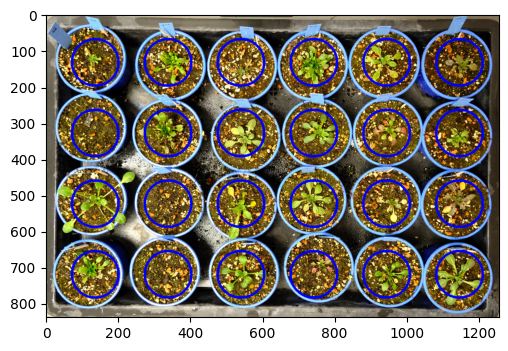

In [680]:
rois = pcv.roi.auto_grid(mask=a_fill, nrows=4, ncols=6, img=scaled_img)


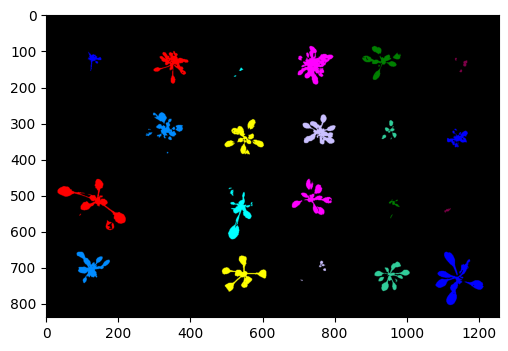

In [681]:
# Create a labeled mask, this function works very similarly to the roi.filter step above 
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=rois, roi_type="partial")


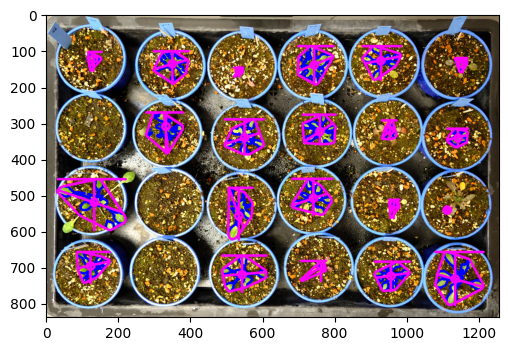

In [682]:
shape_img = pcv.analyze.size(img=scaled_img, labeled_mask=labeled_mask, n_labels=24)


In [683]:
pcv.outputs.save_results(filename='/Users/nhutran/Documents/batch1/b1_results/G_1311')

In [ ]:
######### My Batch 2 ########

In [684]:
os.chdir("/Users/nhutran/Documents/batch2")

In [685]:
### batch 2- different time points ###

In [1218]:
os.chdir("/Users/nhutran/Documents/batch2/25.10")
#os.chdir("/Users/nhutran/Documents/batch2/31.10")
#os.chdir("/Users/nhutran/Documents/batch2/06.11")
#os.chdir("/Users/nhutran/Documents/batch2/13.11")
#os.chdir("/Users/nhutran/Documents/batch2/20.11")

In [1284]:
# Input/output options
args = WorkflowInputs(
    images=["L.JPG"],    
    names="L_2510",
    result="L_2510_res",
    outdir=".",
    writeimg=True,
    debug="plot",
    sample_label="genotype"
    )

In [1285]:
# Set debug to the global parameter 
pcv.params.debug = args.debug

# Set plotting size (default = 100)
pcv.params.dpi = 100

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

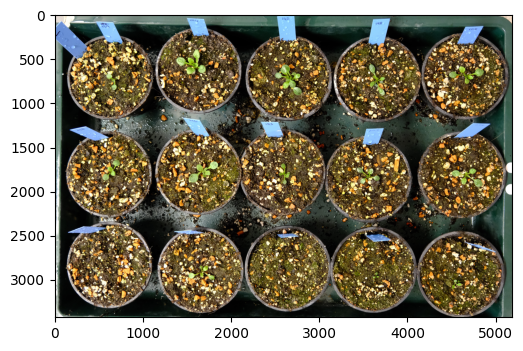

In [1286]:
# Inputs:
#   filename = Image file to be read in 
#   mode     = How to read in the image; either 'native' (default), 
#              'rgb', 'gray', 'csv', or 'envi'
img, path, filename = pcv.readimage(filename="/Users/nhutran/Documents/batch2/25.10/L.JPG")

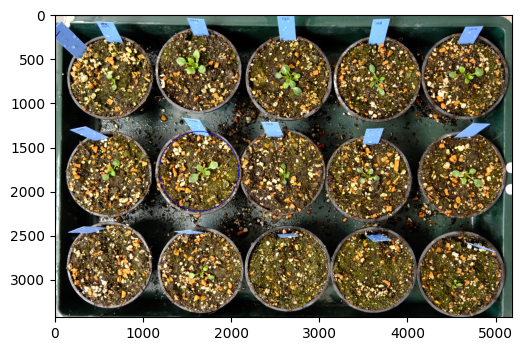

In [1297]:
# We define the circular region interest by x,y for the center, and r for the radius of the circle to get made 
reference_roi = pcv.roi.circle(img=img, x=1630, y=1770, r=450)

In [1298]:
#real-life reference object's size # here is diameter of the pots
pot_dia_mm = 90
# Calculate the scaling factor based on the diameter of the pots
pixels_per_mm = (450/2)/(pot_dia_mm/2) # 180 is radius of the reference_roi = r/2 = 360/2
scaling_factor = 1/pixels_per_mm  # Invert the ratio to get the scaling factor


In [1299]:
# Resize the image based on the scaling factor
scaled_img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)

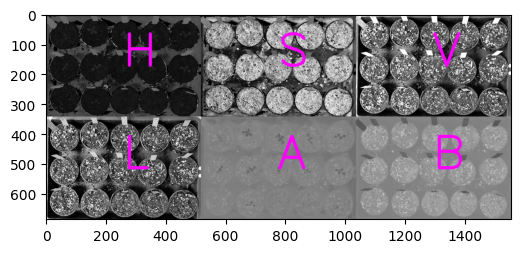

In [1300]:
colorspaces = pcv.visualize.colorspaces(rgb_img=scaled_img, original_img=False)


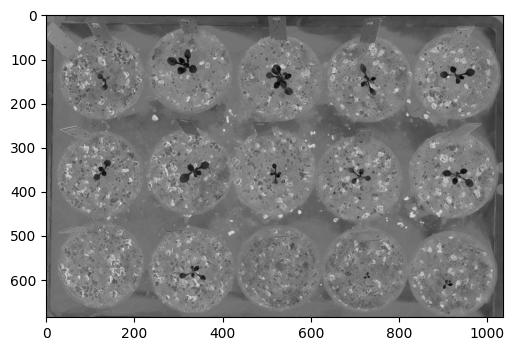

In [1301]:
a = pcv.rgb2gray_lab(rgb_img=scaled_img, channel='a')

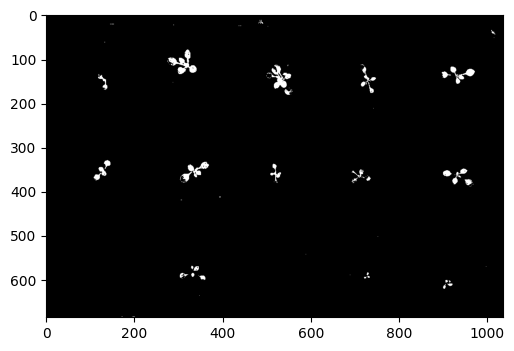

In [1312]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=107, object_type='dark')


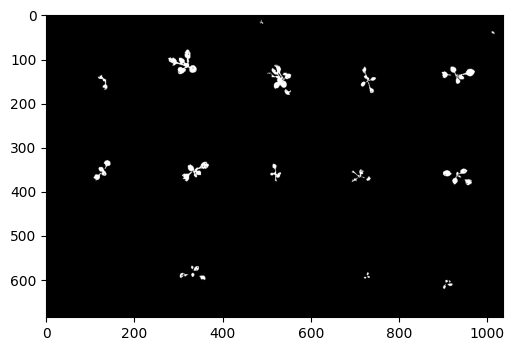

In [1313]:
a_fill = pcv.fill(bin_img=a_thresh, size=10)

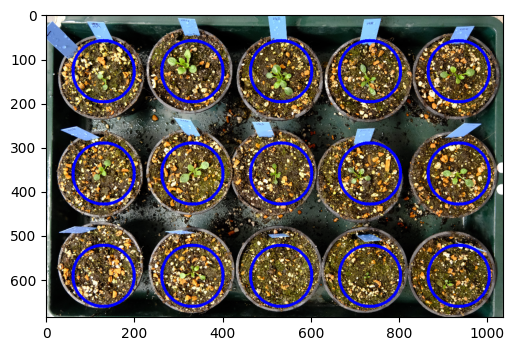

In [1315]:
rois = pcv.roi.auto_grid(mask=a_fill, nrows=3, ncols=5, img=scaled_img)


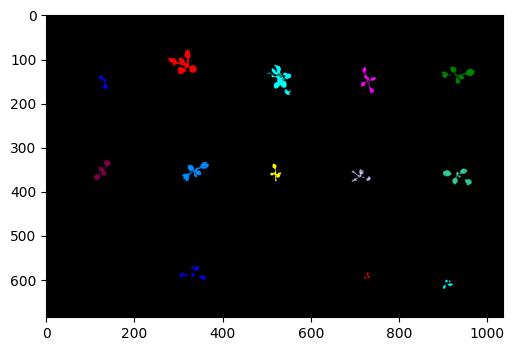

In [1316]:
# Create a labeled mask, this function works very similarly to the roi.filter step above 
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=rois, roi_type="partial")


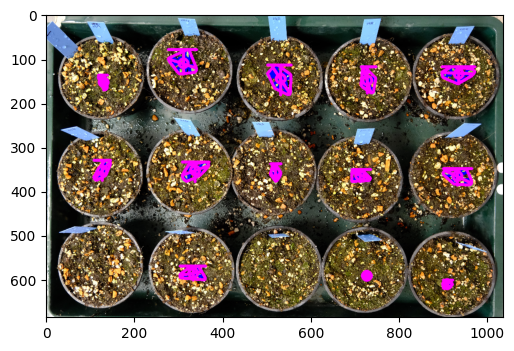

In [1317]:
shape_img = pcv.analyze.size(img=scaled_img, labeled_mask=labeled_mask, n_labels=15)


In [1318]:
pcv.outputs.save_results(filename='/Users/nhutran/Documents/batch2/b2_results/L_2510')

In [ ]:
#### My batch 3 - different time points ####

In [1134]:
#os.chdir("/Users/nhutran/Documents/batch3/06.11")
#os.chdir("/Users/nhutran/Documents/batch3/13.11")
os.chdir("/Users/nhutran/Documents/batch3/20.11")

In [1195]:
# Input/output options
args = WorkflowInputs(
    images=["O.JPG"],    
    names="O_2011",
    result="O_2011_res",
    outdir=".",
    writeimg=True,
    debug="plot",
    sample_label="genotype"
    )

In [1196]:
# Set debug to the global parameter 
pcv.params.debug = args.debug

# Set plotting size (default = 100)
pcv.params.dpi = 100

# Increase text size and thickness to make labels clearer
# (size may need to be altered based on original image size)
pcv.params.text_size = 10
pcv.params.text_thickness = 20

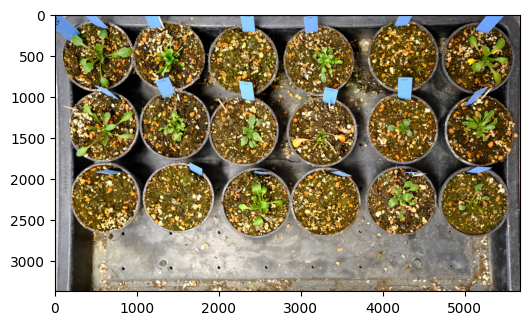

In [1197]:
# Inputs:
#   filename = Image file to be read in 
#   mode     = How to read in the image; either 'native' (default), 
#              'rgb', 'gray', 'csv', or 'envi'
img, path, filename = pcv.readimage(filename="/Users/nhutran/Documents/batch3/20.11/O.JPG")

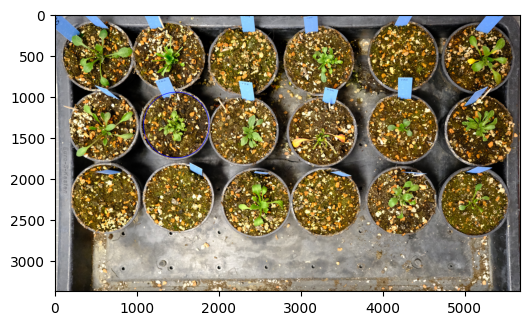

In [1205]:
# We define the circular region interest by x,y for the center, and r for the radius of the circle to get made 
reference_roi = pcv.roi.circle(img=img, x=1480, y=1350, r=400)

In [1206]:
#real-life reference object's size # here is diameter of the pots
pot_dia_mm = 90
# Calculate the scaling factor based on the diameter of the pots
pixels_per_mm = (400/2)/(pot_dia_mm/2) # 180 is radius of the reference_roi = r/2 = 360/2
scaling_factor = 1/pixels_per_mm  # Invert the ratio to get the scaling factor


In [1207]:
# Resize the image based on the scaling factor
scaled_img = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)

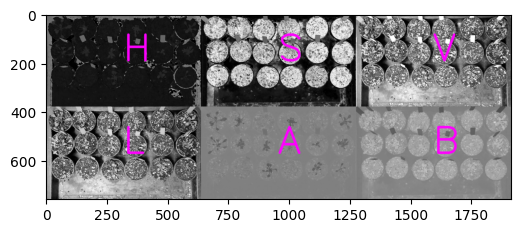

In [1208]:
colorspaces = pcv.visualize.colorspaces(rgb_img=scaled_img, original_img=False)


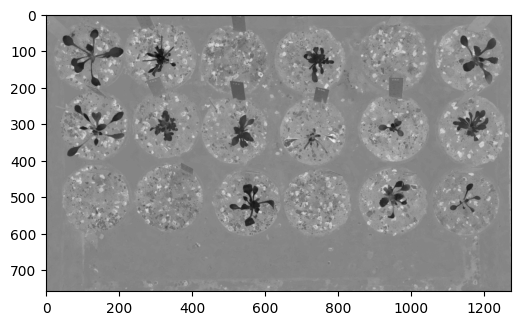

In [1209]:
a = pcv.rgb2gray_lab(rgb_img=scaled_img, channel='a')

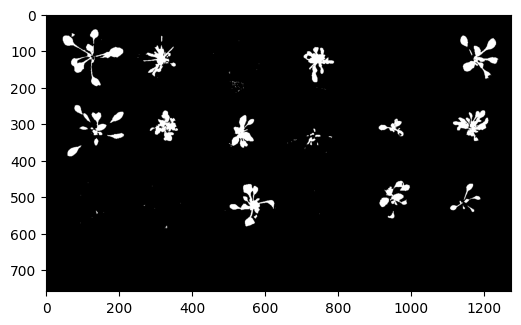

In [1211]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=111, object_type='dark')


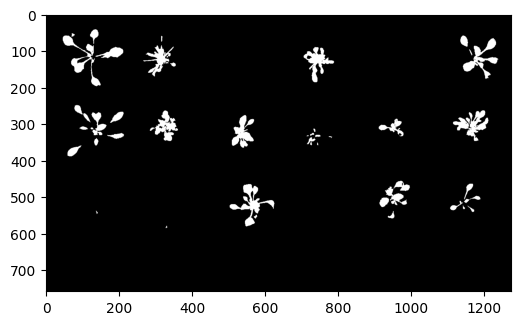

In [1212]:
a_fill = pcv.fill(bin_img=a_thresh, size=10)

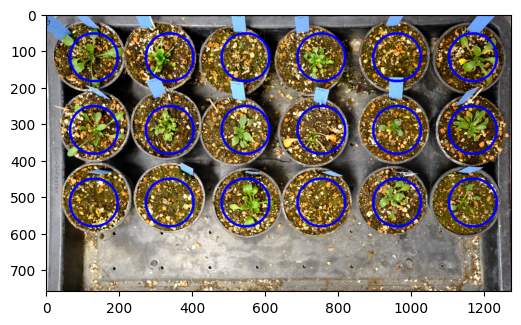

In [1214]:
rois = pcv.roi.auto_grid(mask=a_fill, nrows=3, ncols=6, img=scaled_img)


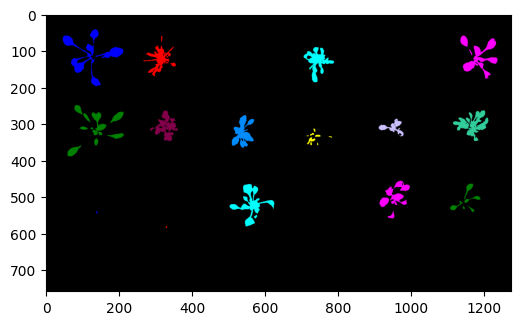

In [1215]:
labeled_mask, num_plants = pcv.create_labels(mask=a_fill, rois=rois, roi_type="partial")


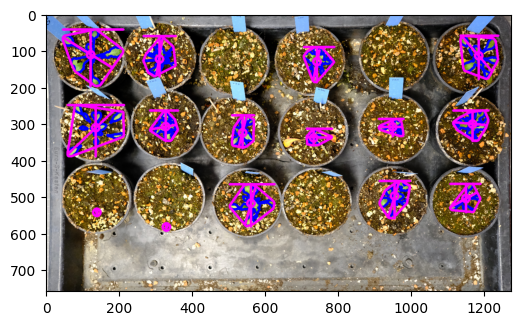

In [1216]:
shape_img = pcv.analyze.size(img=scaled_img, labeled_mask=labeled_mask, n_labels=24)


In [1217]:
pcv.outputs.save_results(filename='/Users/nhutran/Documents/batch3/b3_results/O_2011')